In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import utils
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

In [2]:
# #read the sdf file of 10 predictable molecules
# ligands_996 =Chem.SDMolSupplier('ndonor.sdf')
# #create the ecfp fingerprint
# #x is the input, 2 is the radius
# morgan_996=[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=256) for x in ligands_996]
# efp_996=np.array(morgan_996)
# efp_996.shape

In [3]:
# # #save the ecfp in a csv file
# pd.DataFrame(efp_996).to_csv('ecfp_ndonor.csv')

In [4]:
# #define a function for normalizing in vertical order
# def col_normalize(X):
#     X1=np.matrix(X)
#     X_1=X1.transpose()
#     X_2=np.array(X_1)
#     X_3=preprocessing.normalize(X_2,norm="l2")
#     X_4=np.matrix(X_3)
#     X_5=X_4.transpose()
#     X_6=np.array(X_5)
#     return X_6

In [5]:
#read the file containing the ecfp and isomer(1 or 2) and normalize
input=pd.read_csv('input_992_nfp.csv')#Put address
efp_996=pd.read_csv('neuralfp_992.csv')
efp_996=np.array(efp_996)
Isomer=input[['Isomer']].copy()
X_996=np.concatenate((efp_996,Isomer),axis=1)
print(len(efp_996))
#Isomer_positive=input_positive[['Isomer']].copy()
#X_996=np.concatenate((efp_996,Isomer_positive),axis=1)
#X_785=col_normalize(X_785)
X_996.shape

992


(992, 258)

In [7]:
#assign the Hammett constants to Y
Y_996=input[['Hammett Constant']].copy()
Y_996=np.array(Y_996)

In [8]:
efp_ndonor=pd.read_csv('neuralfp_10.csv')
efp_ndonor=np.array(efp_ndonor)
X_ndonor=efp_ndonor
X_ndonor.shape

(10, 258)

In [14]:
#create null list to record values later
MSE_boot=np.zeros((1000),dtype= float)
#Index= np.zeros((1000,662),dtype=int)
Y_prediction_train=np.zeros((992,1000),dtype=float)
#Y_prediction_test=np.zeros((334,1000),dtype=float)
Y_pred_all=np.zeros((992,1000),dtype=float)
Y_target_train=np.zeros((992,1000),dtype=float)
#Y_target_test=np.zeros((334,1000),dtype=float)
Y_prediction_ndonor=np.zeros((10,1000),dtype=float)
MSE_boot=np.zeros((1000),dtype= float)
print(Y_target_train[0].shape)

(1000,)


In [15]:
regr = RandomForestRegressor(n_estimators=1, max_depth=None, random_state=None,bootstrap=0)

In [16]:
# list(X_996).index("infinity")

In [17]:
for m in range(0,1000):
    #positive part
    index_996=np.random.choice(992, size=992, replace=1)
    X_train=X_996[index_996]
    Y_train=Y_996[index_996]
    X_test=np.delete(X_train,index_996,axis=0)
    Y_test=np.delete(Y_train,index_996,axis=0)
    #Y_positive_left.shape
    #negative part
#     index_negative=np.random.choice(183, size=183, replace=1)
#     X_121=X_183[index_negative]
#     Y_121=Y_negative[index_negative]
#     X_negative_left=np.delete(X_183,index_negative,axis=0)
#     Y_negative_left=np.delete(Y_negative,index_negative,axis=0)
#     #neutral part
#     index_zeros=np.random.choice(28, size=28, replace=1)
#     X_18=X_28[index_zeros]
#     Y_18=Y_zeros[index_zeros]
#     X_zeros_left=np.delete(X_28,index_zeros,axis=0)
#     Y_zeros_left=np.delete(Y_zeros,index_zeros,axis=0)
#     #target
#     X_662=np.concatenate((X_523,X_121,X_18),axis=0)
#     Y_662=np.concatenate((Y_523,Y_121,Y_18),axis=0)
#     X_662, Y_662 = shuffle(X_662, Y_662)
#     #X_662.shape
#     #print(Y_662.shape)
#     #left
#     X_left=np.concatenate((X_positive_left,X_negative_left,X_zeros_left),axis=0)
#     Y_left=np.concatenate((Y_positive_left,Y_negative_left,Y_zeros_left),axis=0)
#     Y_target_train[:,m]=Y_662.ravel()
#     #Y_target_test[:,m]=Y_left.ravel()
#     #Y_left.shape
#     #RF
    X_resample= X_train
    Y_resample= Y_train
    regr.fit(X_resample, Y_resample.ravel())
    Y_pred_train=regr.predict(X_resample)    #Fit RF on training set
    Y_pred_test=regr.predict(X_test)        #Fit RF on testing set
    Y_pred_all_each=regr.predict(X_996)     # Fit RF on complete database
    Y_pred_all[:,m]=Y_pred_all_each
    #Y_prediction_test[:,m]=Y_pred_left
    Y_prediction_train[:,m]=Y_pred_train
    #Y_pred_all=regr.predict(X_996)
    Y_pred_ndonor=regr.predict(X_ndonor)    # Fit RF on ndonor
    Y_prediction_ndonor[:,m]=Y_pred_ndonor
    MSE_train=mean_squared_error(Y_resample, Y_pred_train)
    MSE_test=mean_squared_error(Y_test, Y_pred_test)
    MSE_boot[m]=(MSE_train*0.368)+(0.632)*(MSE_test)

In [18]:
Y_prediction_mean=Y_pred_all.mean(axis=1)
Y_prediction_mean

array([ 2.72890000e-01,  5.55800000e-02,  8.03800000e-02, -3.28500000e-01,
       -3.60830000e-01,  4.03090000e-01,  4.72360000e-01,  3.35130000e-01,
        2.20162500e-01,  5.33560000e-01,  5.66740000e-01,  7.26100000e-01,
        7.82650000e-01,  3.11320000e-01,  3.29100000e-01,  3.13820000e-01,
        3.19440000e-01,  4.66630000e-01,  5.15183333e-01,  1.90090000e-01,
        1.02540000e-01,  4.10270000e-01,  4.45650000e-01,  3.98660000e-01,
        4.93060000e-01,  4.18200000e-01,  4.79950000e-01,  5.14246667e-01,
        5.37875000e-01,  2.98940000e-01,  3.09330000e-01,  4.71965000e-01,
        5.30940000e-01,  4.70000000e-02, -1.36500000e-02,  1.39248571e-01,
        1.38281667e-01, -9.20800000e-02, -1.32060000e-01, -6.79000000e-02,
       -1.39130000e-01, -5.62600000e-02,  1.83010000e-01, -1.34300000e-01,
        1.28986667e-01,  1.28762500e-01,  1.86730000e-01,  1.75150000e-01,
        5.25400000e-02, -6.90300000e-02,  1.34460000e-01,  1.29175000e-01,
        1.31170000e-01,  

In [19]:
Y_prediction_std=Y_pred_all.std(axis=1)
Y_prediction_std

array([0.05891984, 0.11988938, 0.11496545, 0.28115361, 0.24245332,
       0.15205444, 0.14242623, 0.13697001, 0.13326864, 0.07891088,
       0.08826422, 0.15217947, 0.14789617, 0.10326402, 0.13100454,
       0.1037507 , 0.12233677, 0.10326346, 0.09946797, 0.11299864,
       0.13348464, 0.06447346, 0.07771215, 0.08623343, 0.09266842,
       0.07344358, 0.08135538, 0.11864037, 0.12952148, 0.08302576,
       0.09975596, 0.09714507, 0.10157518, 0.09234934, 0.11475094,
       0.09104354, 0.10000481, 0.0778362 , 0.07507034, 0.07482239,
       0.10234033, 0.09208047, 0.14508701, 0.10999595, 0.08155949,
       0.09550707, 0.0827128 , 0.09503777, 0.11699294, 0.1596    ,
       0.10551828, 0.11527638, 0.15319696, 0.16349516, 0.13043117,
       0.17374442, 0.22884242, 0.27280043, 0.06625897, 0.11855292,
       0.16766563, 0.18034872, 0.14473313, 0.15964577, 0.06955119,
       0.05792243, 0.13767776, 0.15101531, 0.17736647, 0.195064  ,
       0.26594572, 0.08609253, 0.10920049, 0.09991162, 0.12588

In [20]:
sigma1=Y_prediction_std*2.03/(1000**0.5)
#sigma1.min()

In [21]:
MSE_all=mean_squared_error(Y_prediction_mean,Y_996)
MSE_all

0.003745050940350189

In [38]:
#n_donor with NH2
Y_ndonor_mean=Y_prediction_ndonor.mean(axis=1)
print("        NOC,         NC,           N,          NCF3,         NNO2")
Y_ndonor_mean

        NOC,         NC,           N,          NCF3,         NNO2


array([ 0.04118   , -0.2179075 ,  0.34739667,  0.36858   ,  0.22687   ,
        0.12149667,  0.32989214,  0.06638   ,  0.47766   ,  0.39675   ])

In [23]:
Y_ndonor_std=Y_prediction_ndonor.std(axis=1)
Y_ndonor_std

array([0.24421263, 0.33841613, 0.41904233, 0.3484692 , 0.45990249,
       0.18149923, 0.20108692, 0.24758816, 0.19385697, 0.20867184])

In [46]:
ndonor=np.zeros((2,10),dtype=float)
ndonor[0]=Y_ndonor_mean
ndonor[1]=Y_ndonor_std
# ndonor=np.concatenate((Y_ndonor_mean,Y_ndonor_std),axis=1)
pd.DataFrame(ndonor.T).to_csv('ndonor_ms.csv')#Put address
ndonor.T

array([[ 0.04118   ,  0.24421263],
       [-0.2179075 ,  0.33841613],
       [ 0.34739667,  0.41904233],
       [ 0.36858   ,  0.3484692 ],
       [ 0.22687   ,  0.45990249],
       [ 0.12149667,  0.18149923],
       [ 0.32989214,  0.20108692],
       [ 0.06638   ,  0.24758816],
       [ 0.47766   ,  0.19385697],
       [ 0.39675   ,  0.20867184]])

In [24]:
sigma2=Y_ndonor_std*2.03/(1000**0.5)
sigma2

array([0.01567704, 0.02172437, 0.0269001 , 0.02236971, 0.02952309,
       0.0116512 , 0.01290862, 0.01589373, 0.0124445 , 0.01339553])

In [42]:
pd.DataFrame(Y_prediction_mean).to_csv('Y_prediction_mean.csv')#Put address

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)
# filename = 'Y_all.csv'
# df = pd.read_csv(filename)
# #df1= pd.read_csv('FEC_10000.csv')
# df.columns#, df1.columns

#Plot parameters

xlow = -1.5
xhigh = 2.5


x=input['Hammett Constant']
y=Y_prediction_mean
y_err=[Y_prediction_std,Y_prediction_std]

Text(-1.4, 1.9, 'Test set: 992 data points')

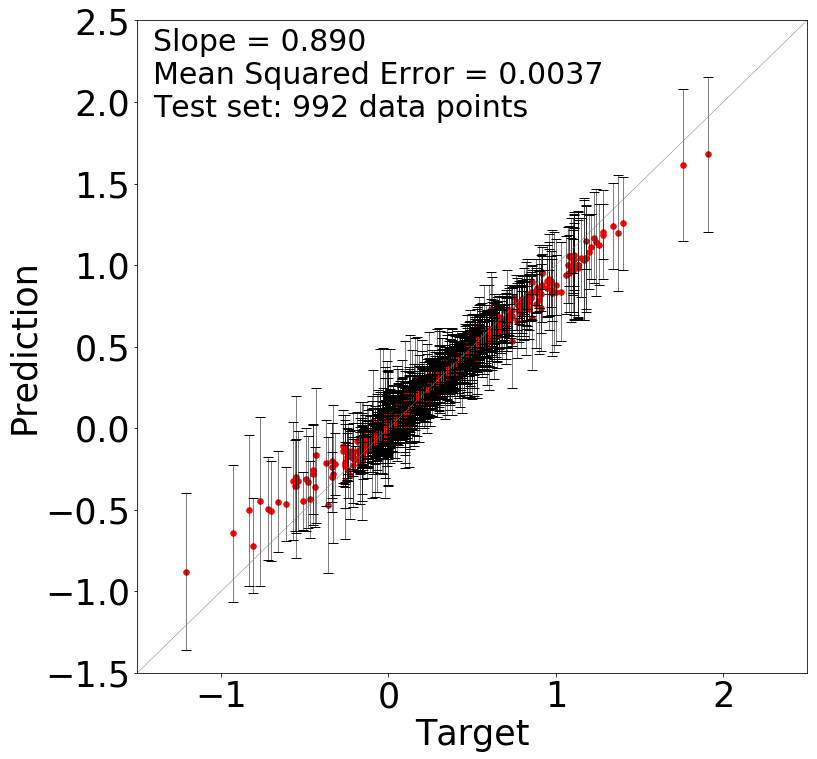

In [45]:
def scatplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots(figsize=(12,12))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.scatter(x_data, y_data, color = 'red',s=30)
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data,  
                yerr = error_data, 
                color = 'black', 
                ls = 'none', 
                lw = 0.5, capsize = 5)
    plt.xlim(xlow,xhigh)
    plt.ylim(xlow,xhigh)
    ax.plot([xlow, xhigh], [xlow, xhigh], color='gray', linestyle='-', linewidth=0.5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title,fontsize=22.5)
    

# Call the function to create plot
scatplot(x_data = x, 
         y_data = y,
         error_data = y_err,
         x_label = 'Target',
         y_label = 'Prediction',
         title = '')

plt.annotate('Slope = 0.890', 
             xy=(-1.4, 2.3),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Mean Squared Error = 0.0037', 
             xy=(-1.4, 2.1),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Test set: 992 data points', 
             xy=(-1.4, 1.9),  
             xycoords='data',
             textcoords='offset points',
             fontsize='30'
            # arrowprops=dict(arrowstyle="->")
            )
        
#Plotting prediction for inputs without 
#plt.scatter(x1, y1, color = 'green',s=30)
#plt.errorbar(x1, y1,yerr = y1_err, color = 'k', ls = 'none', lw = 0.5, capsize = 5)
#plt.show()